## Libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
import re

## Reading images

In [3]:
image_list = []
filenames = glob.glob('./Magrabia/MagrabiaMale/*.tif')
filenames.sort(key=lambda f: int(re.sub('\D', '', f)))

for filename in filenames:
    if 'prime' not in filename:
        im = cv2.imread(filename)
        image_list.append(im)

In [4]:
img = cv2.imread('image_ex.jpg')
img2=cv2.imread('image_ex2.jpg')
#img3=cv2.imread('data_segmentation/BinRushed/BinRushed1/image1-1.jpg')
#imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # change the color of the image to black and white
#ret, thresh = cv2.threshold(imgray, 0, 255, 0)
#ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [5]:
def remove_noisy(contours):
    final_contours = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 300:                    # to remove noisy points
            final_contours.append(contour)
    return final_contours

In [6]:
def create_window(image):
    cv2.namedWindow('image',cv2.WINDOW_NORMAL)
    cv2.resizeWindow('image', 1024,722)
    cv2.imshow('image',image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [7]:
def calculate_area(final_contours):
    for cont in final_contours:
        area = cv2.contourArea(cont)

In [8]:
def im_contours(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #color in grey
    ret, thresh = cv2.threshold(gray,1,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) #apply the mask
    kernel = np.ones((8,8),np.uint8)
    thresh =  cv2.erode(thresh,kernel,iterations = 1) # erosion : dilate the black part of the image 
    thresh=cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel) #remove outlier points
    contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    final_contours=remove_noisy(contours)
    cv2.drawContours(img, final_contours, -1, (0,255,0), 3) #draw the contours
    #create_window(img)
    plt.imshow(thresh)
    calculate_area(final_contours)
    return final_contours

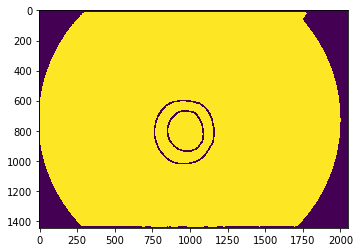

In [9]:
contours=im_contours(img2)

In [10]:
print(contours[1])

[[[936 596]]

 [[937 595]]

 [[938 595]]

 ...

 [[933 596]]

 [[934 596]]

 [[935 596]]]


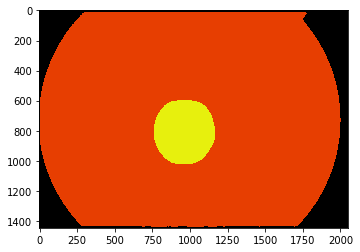

In [11]:
def create_segmented_image(img,contours):
    # creare black image to make sure that all surrounding pixels are black
    black_image = img.copy() 
    black_image[:]=(0,0,0)
    # fill the eye in red
    eye_segmented_image = cv2.fillPoly(black_image.copy(),pts=[contours[0]],color=(231, 62, 1)) 
    # fill the disc
    disc_segmented_image = cv2.fillPoly(eye_segmented_image.copy(),pts=[contours[1]],color=(231, 240, 13))
    # fill the cup
    cup_segmented_image = cv2.fillPoly(eye_segmented_image.copy(),pts=[contours[3]],color=(231, 240, 13))
    return disc_segmented_image, cup_segmented_image

disc_segmented_image, cup_segmented_image  = create_segmented_image(img2,contours)
plt.imshow(disc_segmented_image)

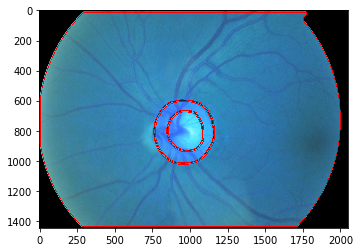

In [13]:
def check_images(img,contours): 
    #draw the contours
    cv2.drawContours(img, contours, -1, (255,0,0), 3) 
    # fill the disc
    disc_segmented_image = cv2.fillPoly(img.copy(),pts=[contours[1]],color=(231, 240, 13))
    # fill the cup
    cup_segmented_image = cv2.fillPoly(img.copy(),pts=[contours[3]],color=(231, 240, 13))
    plt.imshow(img)
    return disc_segmented_image, cup_segmented_image

disc_segmented_image, cup_segmented_image  = check_images(img2,contours)
#plt.imshow(cup_segmented_image)

In [14]:
def save_segmented_images(disc_segmented_image,cup_segmented_image,i):
    cv2.imwrite('./disc_segmented/disc_segmented_image' + str(i) + '.png',disc_segmented_image)
    cv2.imwrite('./cup_segmented/cup_segmented_image' + str(i) + '.png',cup_segmented_image)
save_segmented_images(disc_segmented_image,cup_segmented_image,1)

In [15]:
def save_segmented_images_checked(disc_segmented_image,cup_segmented_image,i):
    cv2.imwrite('./check_images_disc/disc_segmented_image' + str(i) + '.png',disc_segmented_image)
    cv2.imwrite('./check_images_cup/cup_segmented_image' + str(i) + '.png',cup_segmented_image)
save_segmented_images_checked(disc_segmented_image,cup_segmented_image,1)

145
146
147
148
149
150


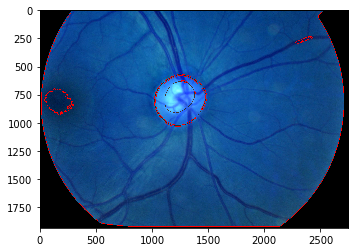

In [16]:
def segmented_dataset(image_list):
    i = 1
    for image in image_list:
        final_contours = im_contours(image.copy())
        try:
            disc_segmented_image, cup_segmented_image  = check_images(image,final_contours)
            save_segmented_images_checked(disc_segmented_image,cup_segmented_image,i)
        except:
            print(i)
        i += 1

segmented_dataset(image_list)

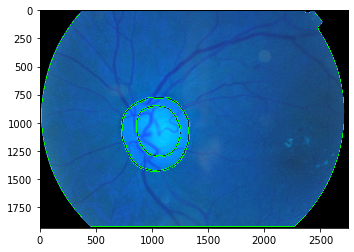

In [55]:
plt.imshow(image_list[3])

In [19]:
cnt = final_contours[2]

area = cv2.contourArea(cnt)

NameError: name 'final_contours' is not defined

In [20]:
area/1000

NameError: name 'area' is not defined

In [21]:
len(contours)

NameError: name 'contours' is not defined

In [23]:
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)